In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import random
from mpl_toolkits import mplot3d

In [7]:
def createPlantedPartitionGraph(n,c,eps):
    G = nx.Graph()
    p_in = (2*c+eps)/(2*n)
    p_out = (2*c-eps)/(2*n)
    k = n//2
    for i in range(k):
        G.add_node(i)
        G.add_node(i+k)
        for j in range(k):
            if j>i:
                #connection between group 1
                if random.random()<p_in:
                    G.add_edge(i,j)
                #connection between group 2
                if random.random()<p_in:
                    G.add_edge(i+k,j+k)
            #connections between the 2 groups
            if random.random()<p_out:
                G.add_edge(i,j+k)
    return G


def createPlantedPartitionGraph(q,n,c,eps):
    p_in = (2*c+eps)/(2*n)
    p_out = (2*c-eps)/(2*n)
    G = nx.planted_partition_graph(q, n//2, p_in, p_out)
    return G

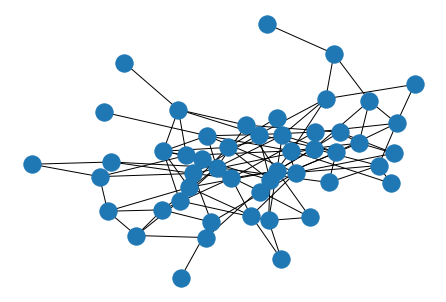

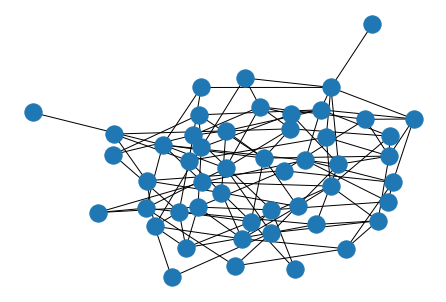

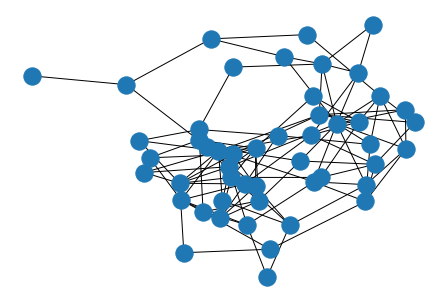

In [14]:
#PROBLEM 1a - visualizations
n = 50
c = 5
eps = [0,4,8]
for e in eps:
    G = createPlantedPartitionGraph(n, c, e)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw_spring(G)
    plt.draw()
    plt.axis('off')
    plt.savefig("eps"+str(e)+".png")

In [17]:
def spreadingProcess(G, p):
    #randomly infect one vertex
    infected = [random.choice(list(G.nodes))]
    index = 0
    t = 1
    #while new people are being infected
    while index < len(infected):
        #loop over the new infected people
        num_inf = len(infected)
        while index < num_inf:
            #infect their uninfected neighbors with prob p
            for node in G.neighbors(infected[index]):
                if not node in infected and random.random() <= p:
                    infected.append(node)
            index += 1
        t += 1
    return (len(infected)/len(G), t)

In [18]:
def latticeGraph(n):
    G = nx.Graph()
    for r in range(n):
        for c in range(n):
            if r>0:
                G.add_edge(n*(r-1)+c, n*r+c)
            if r<n-1:
                G.add_edge(n*(r+1)+c, n*r+c)
            if c>0:
                G.add_edge(n*r+c-1, n*r+c)
            if c<n-1:
                G.add_edge(n*r+c+1, n*r+c)
    return G

In [23]:
#PROBLEM 2a - spreading visualization lattice
n = 50
G = latticeGraph(n)
reps = 300
epid_size = []
epid_len = []
probs = np.arange(0,1,0.005)
for p in probs:
    size = 0
    length = 0
    print(p)
    for i in range(reps):
        (s,l) = spreadingProcess(G, p)
        size += s
        length += l
    epid_size.append(size/reps)
    epid_len.append(length/reps)
print(epid_size)
print(epid_len)

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18
0.185
0.19
0.195
0.2
0.20500000000000002
0.21
0.215
0.22
0.225
0.23
0.23500000000000001
0.24
0.245
0.25
0.255
0.26
0.265
0.27
0.275
0.28
0.28500000000000003
0.29
0.295
0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.34500000000000003
0.35000000000000003
0.355
0.36
0.365
0.37
0.375
0.38
0.385
0.39
0.395
0.4
0.405
0.41000000000000003
0.41500000000000004
0.42
0.425
0.43
0.435
0.44
0.445
0.45
0.455
0.46
0.465
0.47000000000000003
0.47500000000000003
0.48
0.485
0.49
0.495
0.5
0.505
0.51
0.515
0.52
0.525
0.53
0.535
0.54
0.545
0.55
0.555
0.56
0.5650000000000001
0.5700000000000001
0.5750000000000001
0.58
0.585
0.59
0.595
0.6
0.605
0.61
0.615
0.62
0.625
0.63
0.635
0.64
0.645
0.65
0.655
0.66
0.665
0.67
0.675
0.68
0.685
0.6900000000000001
0.6950000000000001
0.7000000000000001
0.705
0.

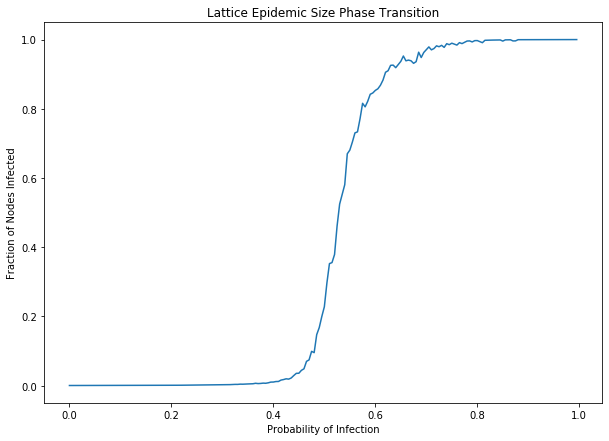

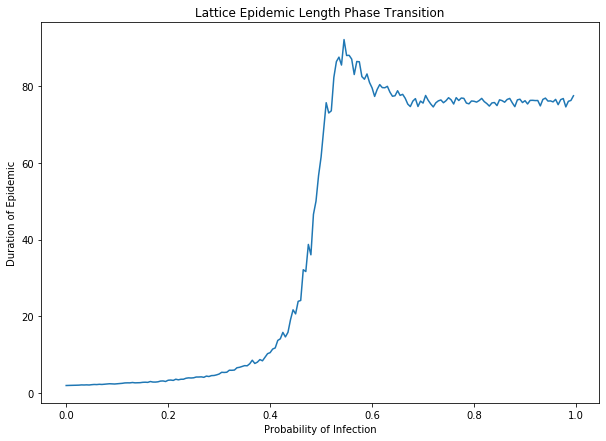

In [24]:
#plot size
plt.figure(figsize=(10,7))
plt.plot(probs, epid_size)
plt.title("Lattice Epidemic Size Phase Transition")
plt.xlabel("Probability of Infection")
plt.ylabel("Fraction of Nodes Infected")
plt.savefig("lattice_size.png")

#plot length
plt.figure(figsize=(10,7))
plt.plot(probs, epid_len)
plt.title("Lattice Epidemic Length Phase Transition")
plt.xlabel("Probability of Infection")
plt.ylabel("Duration of Epidemic")
plt.savefig("lattice_length.png")

In [25]:
def longRangeLatticeGraph(n,q):
    G = nx.Graph()
    for r in range(n):
        for c in range(n):
            if r>0:
                G.add_edge(n*(r-1)+c, n*r+c)
            if r<n-1:
                G.add_edge(n*(r+1)+c, n*r+c)
            if c>0:
                G.add_edge(n*r+c-1, n*r+c)
            if c<n-1:
                G.add_edge(n*r+c+1, n*r+c)
            #long range edges
            for r2 in range(r+1,n):
                for c2 in range(c+1,n):
                    if r2-r + c2-c >5 and random.random()<q:
                        G.add_edge(n*r+c, n*r2+c2)
    return G

In [32]:
#PROBLEM 2b - spreading visualization with long range lattice
n = 50
reps = 10
epid_size_2d = []
epid_len_2d = []
probs = np.arange(0,1.01,0.1)
#q = np.append(np.arange(0,0.1,0.01),np.arange(0.1,1,0.1))
#probs = np.append(np.arange(0,0.1,0.01),np.arange(0.1,1,0.1))
q = np.arange(0,1.01,0.1)
for q_val in q:
    epid_size = []
    epid_len = []
    G = longRangeLatticeGraph(n,q_val)
    for p in probs:
        size = 0
        length = 0
        print(str(p)+", "+str(q_val))
        for i in range(reps):
            (s,l) = spreadingProcess(G, p)
            size += s
            length += l
        epid_size.append(size/reps)
        epid_len.append(length/reps)
    epid_size_2d.append(epid_size)
    epid_len_2d.append(epid_len)
print(epid_size_2d)
print(epid_len_2d)

0.0, 0.0
0.1, 0.0
0.2, 0.0
0.30000000000000004, 0.0
0.4, 0.0
0.5, 0.0
0.6000000000000001, 0.0
0.7000000000000001, 0.0
0.8, 0.0
0.9, 0.0
1.0, 0.0
0.0, 0.1
0.1, 0.1
0.2, 0.1
0.30000000000000004, 0.1
0.4, 0.1
0.5, 0.1
0.6000000000000001, 0.1
0.7000000000000001, 0.1
0.8, 0.1
0.9, 0.1
1.0, 0.1
0.0, 0.2
0.1, 0.2
0.2, 0.2
0.30000000000000004, 0.2
0.4, 0.2
0.5, 0.2
0.6000000000000001, 0.2
0.7000000000000001, 0.2
0.8, 0.2
0.9, 0.2
1.0, 0.2
0.0, 0.30000000000000004
0.1, 0.30000000000000004
0.2, 0.30000000000000004
0.30000000000000004, 0.30000000000000004


KeyboardInterrupt: 

In [ ]:
#plot epidemic size
X, Y = np.meshgrid(probs,q)
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(epid_size_2d), color='black')
#ax.plot_surface(X, Y, np.asarray(epid_size_2d), rstride=1, cstride=1,
#               cmap='viridis', edgecolor='none')
ax.set_title("Long Range Lattice Epidemic Size Phase Transition")
ax.set_xlabel("Probability of Infection")
ax.set_ylabel("Probability of Long Range Connections")
ax.set_zlabel("Fraction of Nodes Infected")
plt.savefig("lattice_size_2d.png")

#plot epidemic length
X, Y = np.meshgrid(probs,q)
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(epid_len_2d), color='black')
#ax.contour3D(X, Y, np.asarray(epid_len_2d), 50, cmap='binary')
#ax.plot_surface(X, Y, np.asarray(epid_len_2d), rstride=1, cstride=1,
#                cmap='viridis', edgecolor='none')
ax.set_title("Long Range Lattice Epidemic Length Phase Transition")
ax.set_xlabel("Probability of Infection")
ax.set_ylabel("Probability of Long Range Connections")
ax.set_zlabel("Duration of Infection")
plt.savefig("lattice_length_2d.png")